# Text-to-Speech Tacotron2

Tacotron2, Text to Melspectrogram.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-tacotron2](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-tacotron2).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### Tacotron2 description

1. Malaya-speech Tacotron2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.

### List available Tacotron2

In [2]:
malaya_speech.tts.available_tacotron2()

INFO:root:`husein` and `haqkiem` combined loss from training set.


,Size (MB),Quantized Size (MB),Combined loss,understand punctuations
male,104,26.3,0.1733,False
female,104,26.3,0.1733,False
husein,104,26.3,0.1165,False
haqkiem,104,26.3,0.1375,True


`husein` voice contributed by [Husein-Zolkepli](https://www.linkedin.com/in/husein-zolkepli/), recorded using low-end microphone in a small room with no reverberation absorber.

`haqkiem` voice contributed by [Haqkiem Hamdan](https://www.linkedin.com/in/haqkiem-daim/), recorded using high-end microphone in an audio studio.

**Outputs from quantized Tacotron2 models not good as original models, so we are going to skip to load it**.

### Load Tacotron2 model

Tacotron2 use text normalizer from Malaya, https://malaya.readthedocs.io/en/latest/load-normalizer.html#Load-normalizer,

Make sure you install Malaya version > 4.0 to make it works,

```bash
pip install malaya -U
```

```python
def tacotron2(
    model: str = 'male',
    quantized: bool = False,
    pad_to: int = 8,
    true_case: str = None,
    **kwargs
):
    """
    Load Tacotron2 TTS model.

    Parameters
    ----------
    model : str, optional (default='male')
        Model architecture supported. Allowed values:

        * ``'female'`` - Tacotron2 trained on female voice.
        * ``'male'`` - Tacotron2 trained on male voice.
        * ``'husein'`` - Tacotron2 trained on Husein voice, https://www.linkedin.com/in/husein-zolkepli/
        * ``'haqkiem'`` - Tacotron2 trained on Haqkiem voice, https://www.linkedin.com/in/haqkiem-daim/
        
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    pad_to : int, optional (default=8)
        size of pad character with 0. Increase can stable up prediction on short sentence, we trained on 8.

    true_case: str, optional (default=None)
        Load True Case model from https://malaya.readthedocs.io/en/latest/load-true-case.html,
        to fix case sensitive and punctuation errors. Allowed values:

        * ``'small'`` - Small size True Case model.
        * ``'base'`` - Base size True Case model.
        * ``None`` - no True Case model.

    Returns
    -------
    result : malaya_speech.supervised.tts.tacotron_load function
    """
```

In [ ]:
female = malaya_speech.tts.tacotron2(model = 'female')
male = malaya_speech.tts.tacotron2(model = 'male')
husein = malaya_speech.tts.tacotron2(model = 'husein')
haqkiem = malaya_speech.tts.tacotron2(model = 'haqkiem')

In [4]:
# https://www.sinarharian.com.my/article/115216/BERITA/Politik/Syed-Saddiq-pertahan-Dr-Mahathir
string1 = 'Syed Saddiq berkata mereka seharusnya mengingati bahawa semasa menjadi Perdana Menteri Pakatan Harapan'

In [5]:
string2 = 'husein ketiak wangi dan comel dan kacak bergaya'

### Predict

```python
def predict(self, string):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str

    Returns
    -------
    result: Dict[string, decoder-output, postnet-output, universal-output, alignment]
    """
```

It only able to predict 1 text for single feed-forward.

In [6]:
%%time

r_female = female.predict(string1)

CPU times: user 4.26 s, sys: 381 ms, total: 4.65 s
Wall time: 3.98 s


In [7]:
%%time

r_male = male.predict(string1)

CPU times: user 2.4 s, sys: 324 ms, total: 2.72 s
Wall time: 2.3 s


In [8]:
%%time

r_husein = husein.predict(string1)

CPU times: user 2.23 s, sys: 316 ms, total: 2.55 s
Wall time: 2.18 s


In [9]:
%%time

r_haqkiem = haqkiem.predict(string1)

CPU times: user 2.29 s, sys: 319 ms, total: 2.6 s
Wall time: 2.19 s


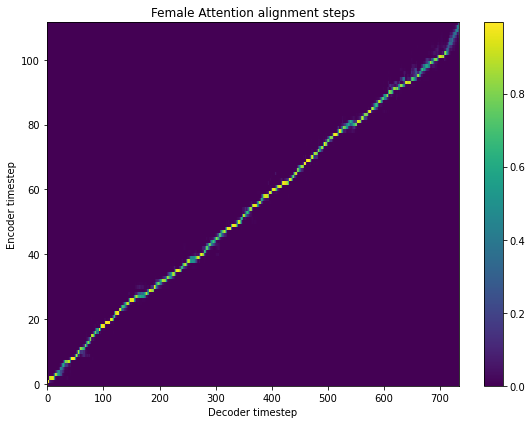

In [10]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Attention alignment steps')
im = ax.imshow(
    r_female['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

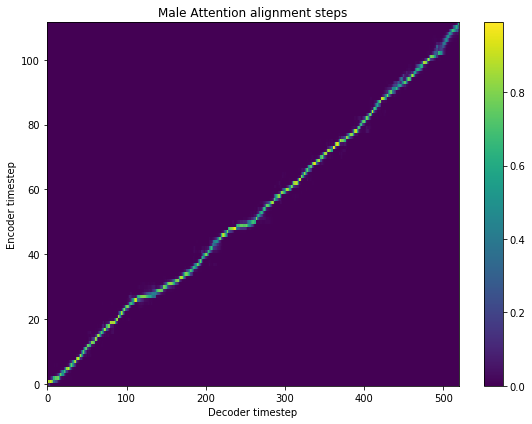

In [23]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Male Attention alignment steps')
im = ax.imshow(
    r_male['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

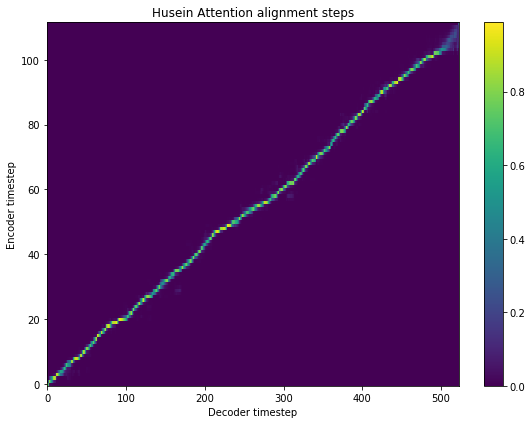

In [24]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Husein Attention alignment steps')
im = ax.imshow(
    r_husein['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

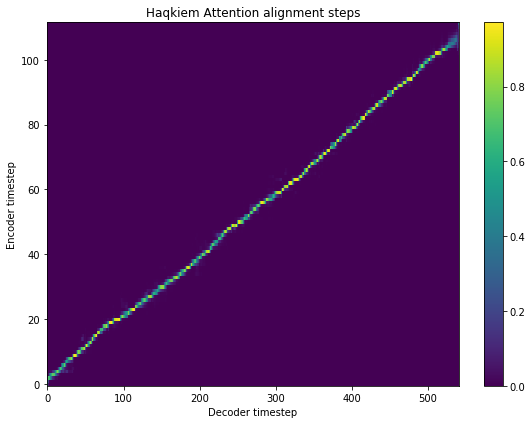

In [25]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Haqkiem Attention alignment steps')
im = ax.imshow(
    r_haqkiem['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

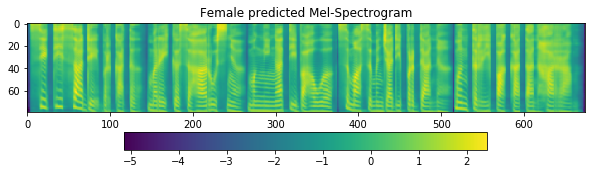

In [26]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_female['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

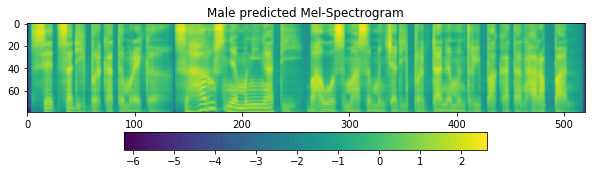

In [27]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Male predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_male['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

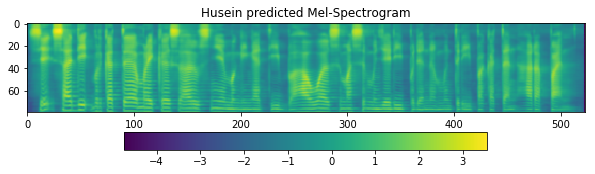

In [28]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Husein predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_husein['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

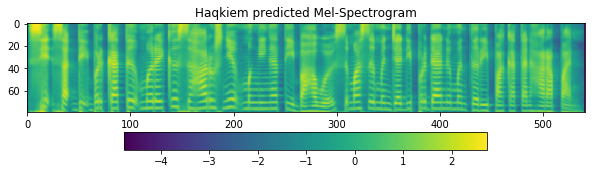

In [30]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Haqkiem predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_haqkiem['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Load Vocoder model

There are 2 ways to synthesize melspectrogram output from TTS models,

1. If you are going to use individual speaker vocoder, make sure the speakers are the same If use female tacotron2, need to use female MelGAN also. Use `postnet-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-vocoder.html
2. If you are going to use universal MelGAN, use `universal-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-universal-melgan.html

We prefer individual speaker vocoder, size only 17MB and faster than universal vocoder.

In [12]:
vocoder_female = malaya_speech.vocoder.melgan(model = 'female')
vocoder_male = malaya_speech.vocoder.melgan(model = 'male')
vocoder_husein = malaya_speech.vocoder.melgan(model = 'husein')
vocoder_haqkiem = malaya_speech.vocoder.melgan(model = 'haqkiem')

In [13]:
universal_melgan = malaya_speech.vocoder.melgan(model = 'universal-1024')

In [14]:
y_ = vocoder_female(r_female['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [15]:
y_ = universal_melgan(r_female['universal-output'])
ipd.Audio(y_, rate = 22050)

In [16]:
y_ = vocoder_male(r_male['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [17]:
y_ = universal_melgan(r_male['universal-output'])
ipd.Audio(y_, rate = 22050)

In [18]:
y_ = vocoder_husein(r_husein['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [19]:
y_ = universal_melgan(r_husein['universal-output'])
ipd.Audio(y_, rate = 22050)

In [36]:
y_ = vocoder_haqkiem(r_haqkiem['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [20]:
y_ = universal_melgan(r_haqkiem['universal-output'])
ipd.Audio(y_, rate = 22050)